In [29]:
### Import libaries and Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ADANIPORTS.NS (1).csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-29,330.000000,354.600006,327.600006,349.250000,338.216370,9816333
1,2019-01-30,349.049988,349.049988,335.600006,338.149994,327.467072,7672859
2,2019-01-31,339.899994,341.700012,330.200012,338.649994,327.951233,6403921
3,2019-02-01,339.899994,346.799988,333.350006,338.450012,327.757568,3119675
4,2019-02-04,337.250000,338.799988,329.049988,335.649994,325.046051,4517829
...,...,...,...,...,...,...,...
1229,2024-01-19,1162.250000,1166.800049,1150.000000,1152.449951,1152.449951,2732559
1230,2024-01-22,1152.449951,1152.449951,1152.449951,1152.449951,1152.449951,0
1231,2024-01-23,1199.150024,1207.199951,1130.250000,1137.099976,1137.099976,7201014
1232,2024-01-24,1138.000000,1146.750000,1118.349976,1120.599976,1120.599976,18373913


In [4]:
df1=df.reset_index()['Close']

<Axes: ylabel='Close'>

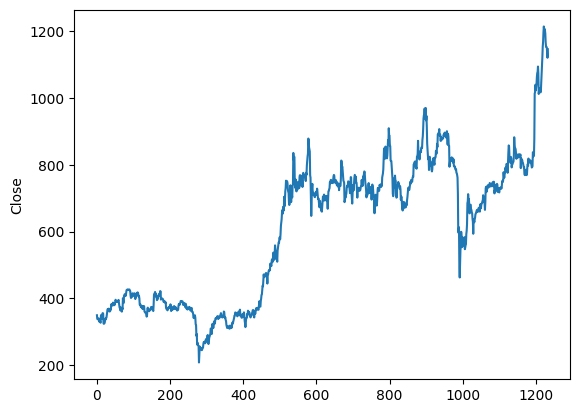

In [5]:
sns.lineplot(df['Close'])

In [30]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [32]:
###splitting dataset into train and test split

In [7]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX),np.array(dataY)

In [9]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [10]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [33]:
### Create the Stacked LSTM model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 303ms/step - loss: 0.0347 - val_loss: 0.0299
Epoch 2/100
11/11 [==============================] - 2s 229ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 3/100
11/11 [==============================] - 3s 250ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 4/100
11/11 [==============================] - 2s 178ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 5/100
11/11 [==============================] - 4s 327ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 6/100
11/11 [==============================] - 2s 177ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 7/100
11/11 [==============================] - 3s 283ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 8/100
11/11 [==============================] - 3s 310ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 9/100
11/11 [==============================] - 3s 244ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 10/100
11/11 [==============================] - 2s 180ms/step - loss: 0.0013 - val_lo

In [36]:
### Predicting and forecasting

In [15]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 36ms/step


In [16]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [17]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

572.3134200993117

In [18]:
math.sqrt(mean_squared_error(y_test,test_predict))

812.2852775859582

In [19]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape

(1, 100)

In [20]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [21]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)



[0.8626214]
101
1 day input [0.5878496  0.5893895  0.59326414 0.59535046 0.59818195 0.61318366
 0.67025983 0.64671404 0.63772294 0.63782227 0.63369931 0.61939299
 0.60627887 0.61924394 0.61522031 0.61382945 0.60955739 0.61884658
 0.611296   0.61333271 0.61954204 0.61278624 0.61338237 0.61889624
 0.57846108 0.60771945 0.60309969 0.60319907 0.60200687 0.5939596
 0.59341313 0.58695543 0.58124285 0.58203769 0.55998214 0.5576474
 0.55888926 0.5708609  0.57344395 0.57319558 0.5576474  0.56281357
 0.5837763  0.59083008 0.58591228 0.60692467 0.59450601 0.59689036
 0.59813222 0.59902639 0.60185782 0.59833093 0.59192289 0.58968754
 0.58029908 0.58149122 0.58392529 0.62580103 0.623665   0.61368041
 0.61596543 0.66648457 0.8000596  0.80487808 0.82643688 0.80984554
 0.81873731 0.82872184 0.85013166 0.86125873 0.86508377 0.88073128
 0.86056333 0.79911583 0.80587157 0.81436592 0.81560779 0.81128612
 0.80388459 0.8112364  0.83458347 0.86493472 0.88068156 0.90944312
 0.94029112 0.95479608 0.98286225 1.

In [22]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [23]:
import matplotlib.pyplot as plt

In [24]:
len(df1)

1234

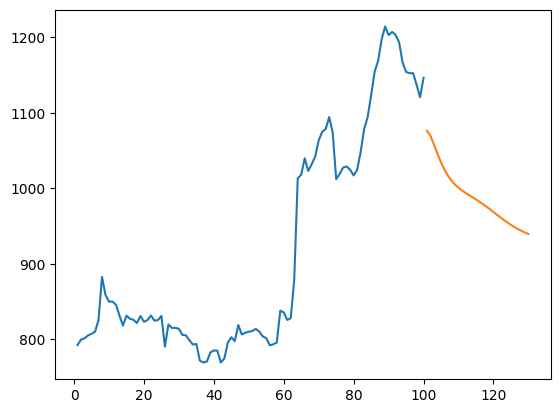

In [25]:
plt.plot(day_new,sc.inverse_transform(df1[1134:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

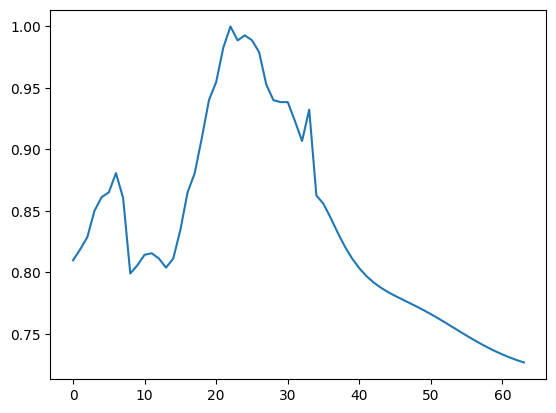

In [26]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [27]:
df3=sc.inverse_transform(df3).tolist()

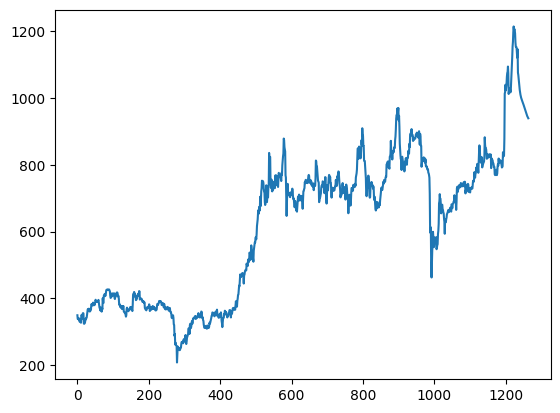

In [28]:
plt.plot(df3)